# pySCENIC protocol: PBMC10k

September 2019

Dataset: *10k PBMCs from a Healthy Donor* available from 10x Genomics ([here](https://support.10xgenomics.com/single-cell-gene-expression/datasets/3.0.0/pbmc_10k_v3)).

In [1]:
# import dependencies
import os
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
from MulticoreTSNE import MulticoreTSNE as TSNE

In [9]:
# set variables for file paths to read from and write to:

# set a working directory
wdir = "/users/jyuan34/da/test"
os.chdir( wdir )

# path to unfiltered loom file (this will be created in the optional steps below)
#Link to the file,
f_loom_path_unfilt = "pbmc10k_unfiltered.loom" # test dataset, n=500 cells

# # path to loom file with basic filtering applied (this will be created in the "initial filtering" step below). Optional.
f_loom_path_scenic = "pbmc10k_filtered_scenic.loom"

# path to anndata object, which will be updated to store Scanpy results as they are generated below
f_anndata_path = "anndata.h5ad"

# path to pyscenic output
f_pyscenic_output = "pyscenic_output.loom"

# loom output, generated from a combination of Scanpy and pySCENIC results:
f_final_loom = 'pbmc10k_scenic_integrated-output.loom'

In [ ]:
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.set_figure_params(dpi=150, fontsize=10, dpi_save=600)

In [ ]:
# Set maximum number of jobs for Scanpy.
sc.settings.njobs = 20

## Expression data import
There are several ways to import expression data. For simplicity we focus on getting the data into a Scanpy anndata object or a loom file.  Scanpy provides functions for reading in a wide variety of formats (described [here](https://icb-scanpy.readthedocs-hosted.com/en/stable/api/index.html#reading)).

### Reading in expression data: 10x Genomics mtx files

In [4]:
f_mtx_dir = '/users/jyuan34/da/filtered_feature_bc_matrix/'

adata = sc.read_10x_mtx(
    f_mtx_dir ,                 # the directory with the `.mtx` file
    var_names='gene_symbols',   # use gene symbols for the variable names (variables-axis index)
    cache=False) 

# Adata cell-gene dataframe

In [5]:
df = adata.to_df()
df

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
AAACCCAAGCGCCCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGGTTCCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACAGAGTTGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACAGGTATGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACATAGTCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGTCATGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGGTTTGAACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCCAAGCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCTTACTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df[df.MIB2>1].MIB2

AAAGTCCTCAACTACG-1    2.0
AAAGTGAAGCATGATA-1    2.0
AAAGTGATCAATGTCG-1    2.0
AACCATGAGTTCACTG-1    2.0
AACCATGGTAGGACCA-1    2.0
                     ... 
TTTACCATCCCATTTA-1    2.0
TTTATGCGTGCGGATA-1    3.0
TTTCACAAGACGAGCT-1    2.0
TTTCGATAGTCCCTAA-1    3.0
TTTGGTTAGTATTCCG-1    2.0
Name: MIB2, Length: 373, dtype: float32

In [7]:
np.sum(adata.X.toarray().transpose(),axis = 0).shape

(11769,)

### write to an unfiltered loom file

Here, we use the loompy functions directly

In [10]:
row_attrs = { 
    "Gene": np.array(adata.var.index) ,
}
col_attrs = { 
    "CellID":  np.array(adata.obs.index) ,
    "nGene": np.array( np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,# for each cell, how many distinct gene in that cell
    "nUMI": np.array( np.sum(adata.X.transpose() , axis=0)).flatten() , # for each cell, how many genes(including duplicates) in total in that cell
}

lp.create( f_loom_path_unfilt, adata.X.transpose(), row_attrs, col_attrs )

In [11]:
adata

AnnData object with n_obs × n_vars = 11769 × 33538
    var: 'gene_ids', 'feature_types'

## Initial/basic filtering

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# read unfiltered data from a loom file
adata = sc.read_loom( f_loom_path_unfilt )

In [14]:
nCountsPerGene = np.sum(adata.X, axis=0) # how many genes exist in all the cells
nCellsPerGene = np.sum(adata.X>0, axis=0) # how many distinct genes exist in all cell

# Show info
print("Number of counts (in the dataset units) per gene:", nCountsPerGene.min(), " - " ,nCountsPerGene.max())
print("Number of cells in which each gene is detected:", nCellsPerGene.min(), " - " ,nCellsPerGene.max())

Number of counts (in the dataset units) per gene: 0.0  -  3567008.0
Number of cells in which each gene is detected: 0  -  11766


In [15]:
nCells=adata.X.shape[0]

# pySCENIC thresholds
minCountsPerGene=3*.01*nCells # 3 counts in 1% of cells
print("minCountsPerGene: ", minCountsPerGene)

minSamples=.01*nCells # 1% of cells
print("minSamples: ", minSamples)

minCountsPerGene:  353.07
minSamples:  117.69


In [16]:
# simply compute the number of genes per cell (computers 'n_genes' column)
sc.pp.filter_cells(adata, min_genes=0)
# mito and genes/counts cuts
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1 
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

### Diagnostic plots, pre-filtering

#### Number of genes expressed per cell

/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":
/gpfs/home/jyuan34/my_envs/lib/python3.7/s

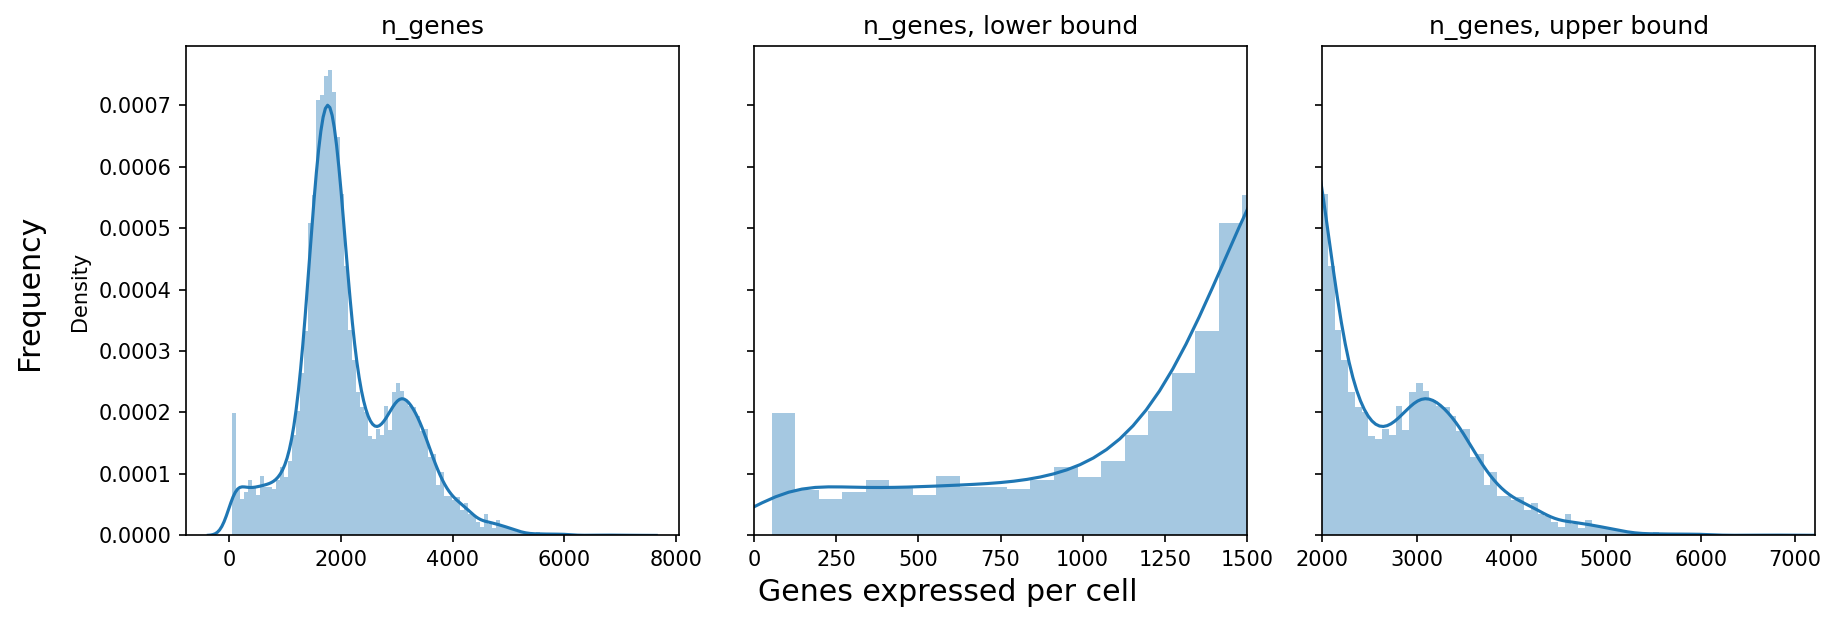

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=True)

x = adata.obs['n_genes']
x_lowerbound = 1500
x_upperbound = 2000
nbins=100

sns.distplot(x, ax=ax1, norm_hist=True, bins=nbins)
sns.distplot(x, ax=ax2, norm_hist=True, bins=nbins)
sns.distplot(x, ax=ax3, norm_hist=True, bins=nbins)

ax2.set_xlim(0,x_lowerbound)
ax3.set_xlim(x_upperbound, adata.obs['n_genes'].max() )

for ax in (ax1,ax2,ax3): 
  ax.set_xlabel('')

ax1.title.set_text('n_genes')
ax2.title.set_text('n_genes, lower bound')
ax3.title.set_text('n_genes, upper bound')

fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')
fig.text(0.5, 0.0, 'Genes expressed per cell', ha='center', va='center', size='x-large')

fig.tight_layout()

#### Percentage of mitochondrial reads per cell

/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":
/gpfs/home/jyuan34/my_envs/lib/python3.7/s

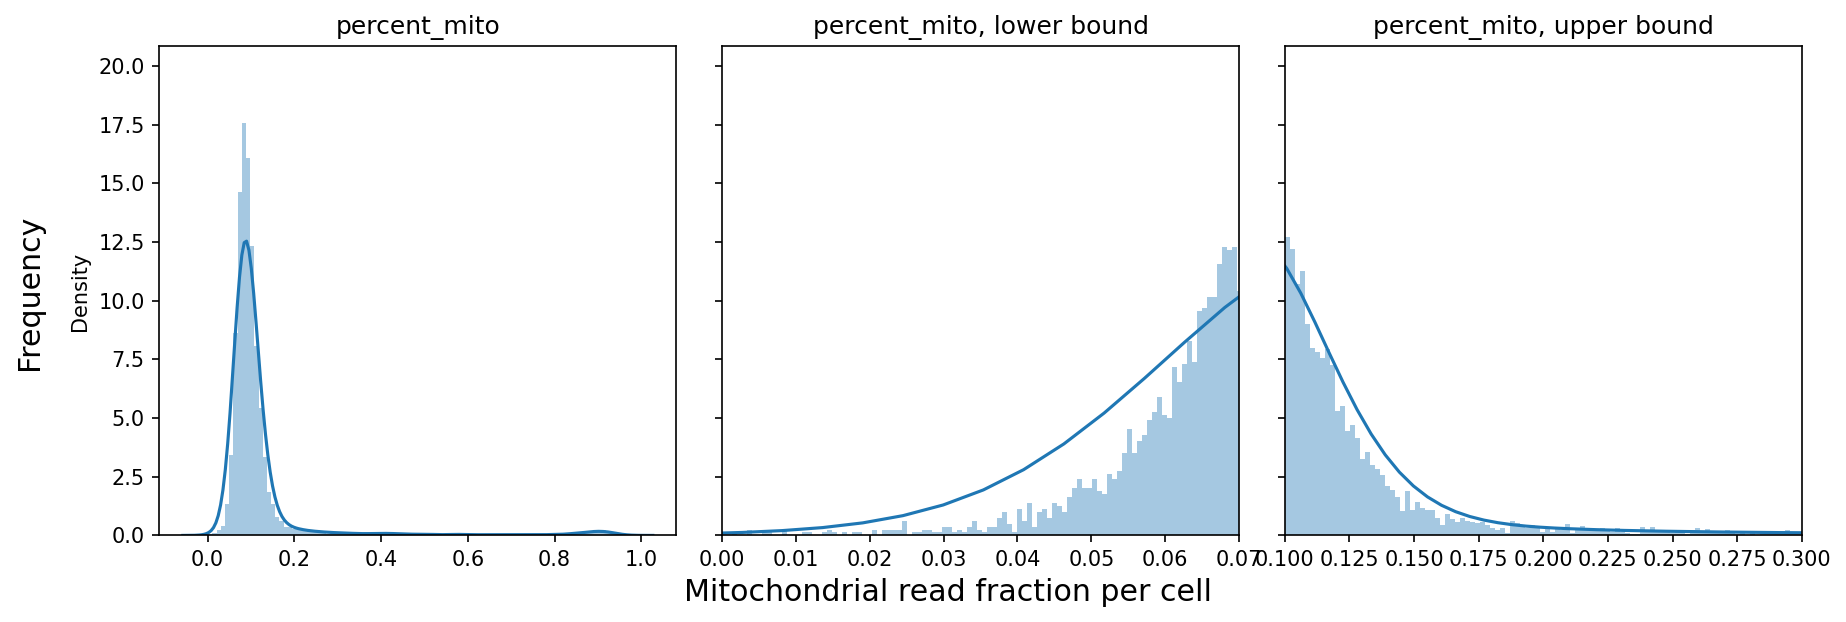

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=True)

x = adata.obs['percent_mito']
x_lowerbound = [0.0, 0.07 ]
x_upperbound = [ 0.10, 0.3 ]
nbins=100

sns.distplot(x, ax=ax1, norm_hist=True, bins=nbins)
sns.distplot(x, ax=ax2, norm_hist=True, bins=int(nbins/(x_lowerbound[1]-x_lowerbound[0])) )
sns.distplot(x, ax=ax3, norm_hist=True, bins=int(nbins/(x_upperbound[1]-x_upperbound[0])) )

ax2.set_xlim(x_lowerbound[0], x_lowerbound[1])
ax3.set_xlim(x_upperbound[0], x_upperbound[1] )
for ax in (ax1,ax2,ax3): 
  ax.set_xlabel('')

ax1.title.set_text('percent_mito')
ax2.title.set_text('percent_mito, lower bound')
ax3.title.set_text('percent_mito, upper bound')

fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')
fig.text(0.5, 0.0, 'Mitochondrial read fraction per cell', ha='center', va='center', size='x-large')

fig.tight_layout()

#### Three-panel summary plots

/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

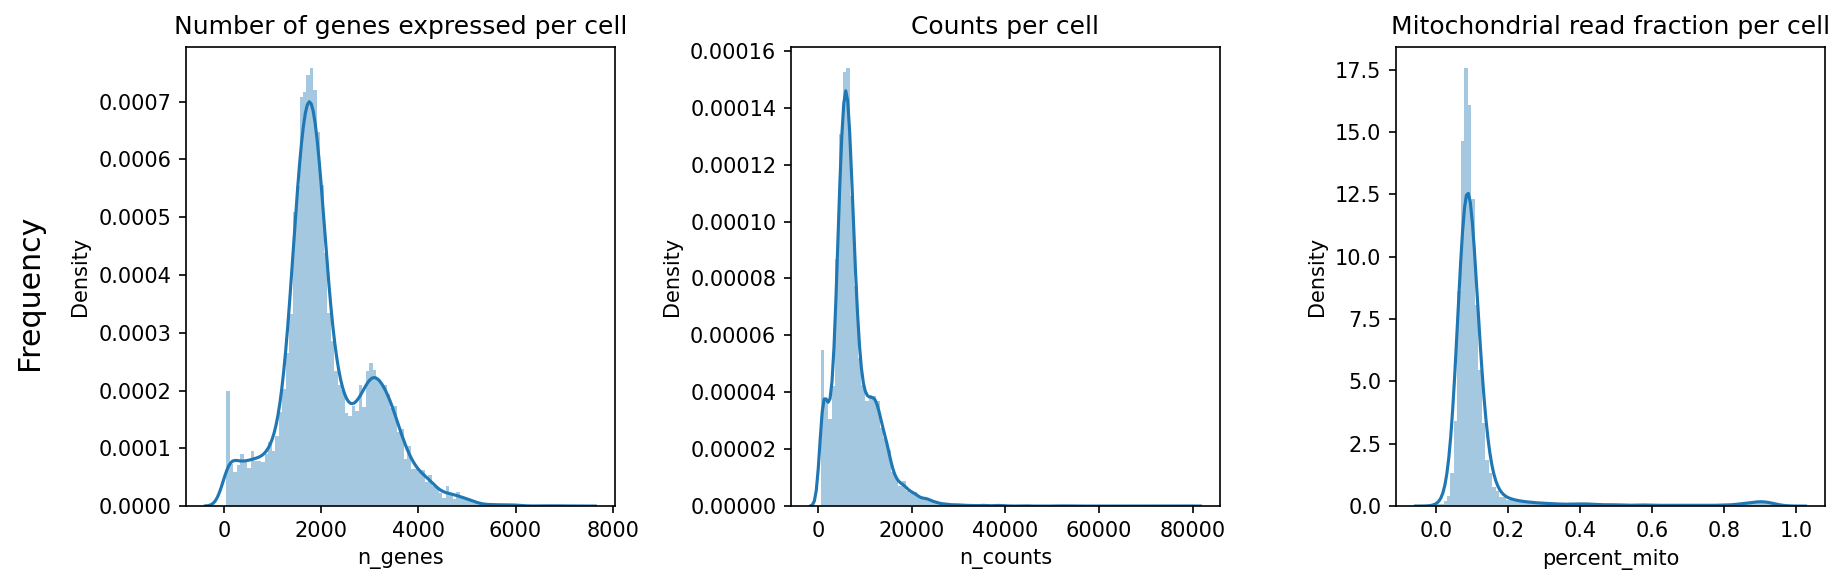

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=False)

sns.distplot( adata.obs['n_genes'], ax=ax1, norm_hist=True, bins=100)
sns.distplot( adata.obs['n_counts'], ax=ax2, norm_hist=True, bins=100)
sns.distplot( adata.obs['percent_mito'], ax=ax3, norm_hist=True, bins=100)

ax1.title.set_text('Number of genes expressed per cell')
ax2.title.set_text('Counts per cell')
ax3.title.set_text('Mitochondrial read fraction per cell')

fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')

fig.tight_layout()

fig.savefig('filtering_panel_prefilter.pdf', dpi=600, bbox_inches='tight')

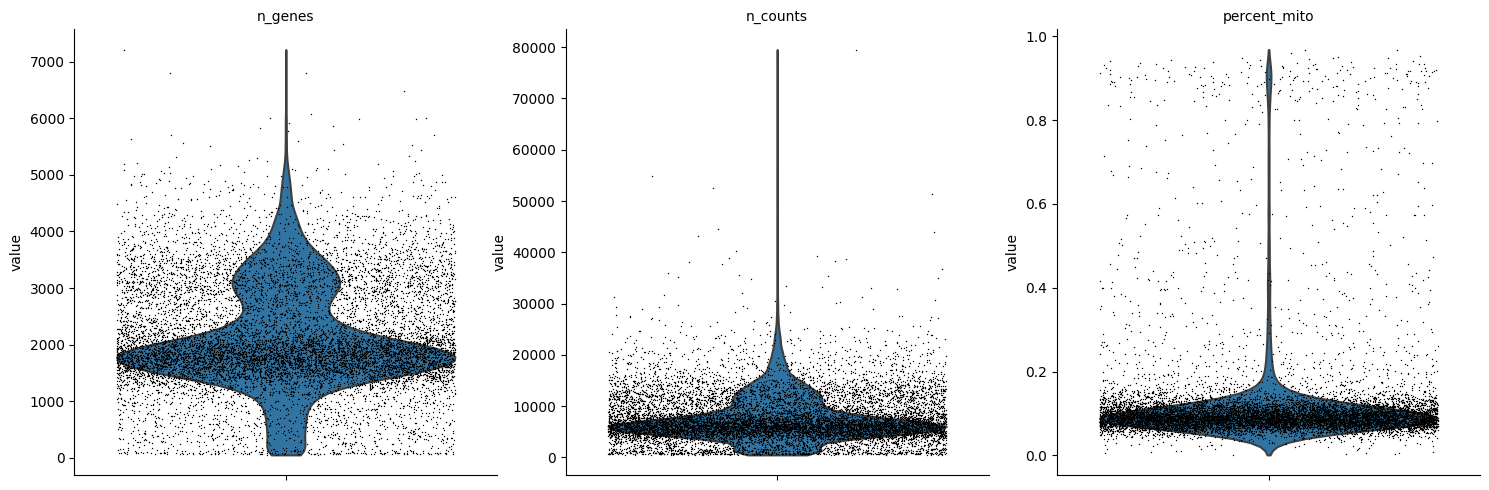

In [20]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
    jitter=0.4, multi_panel=True )

#### Scatter plot, n_genes by n_counts

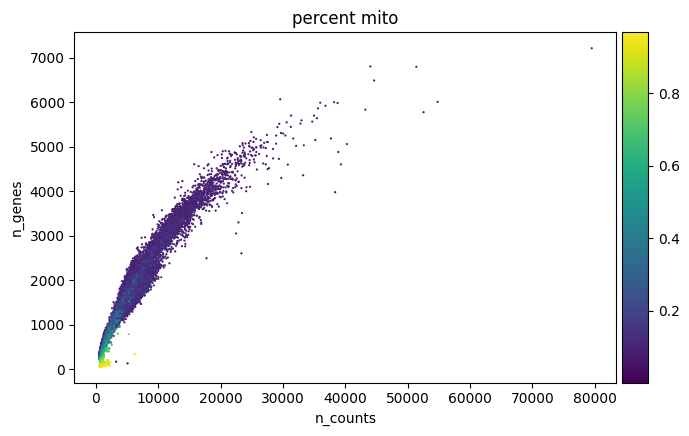

In [21]:
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='percent_mito')

### Carry out the filtering steps:

In [22]:
# initial cuts
sc.pp.filter_cells(adata, min_genes=200 )
sc.pp.filter_genes(adata, min_cells=3 )

In [23]:
adata = adata[adata.obs['n_genes'] < 4000, :]
adata = adata[adata.obs['percent_mito'] < 0.15, :]

### Diagnostic plots, post filtering

#### Three-panel summary plots

/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/ipykernel_

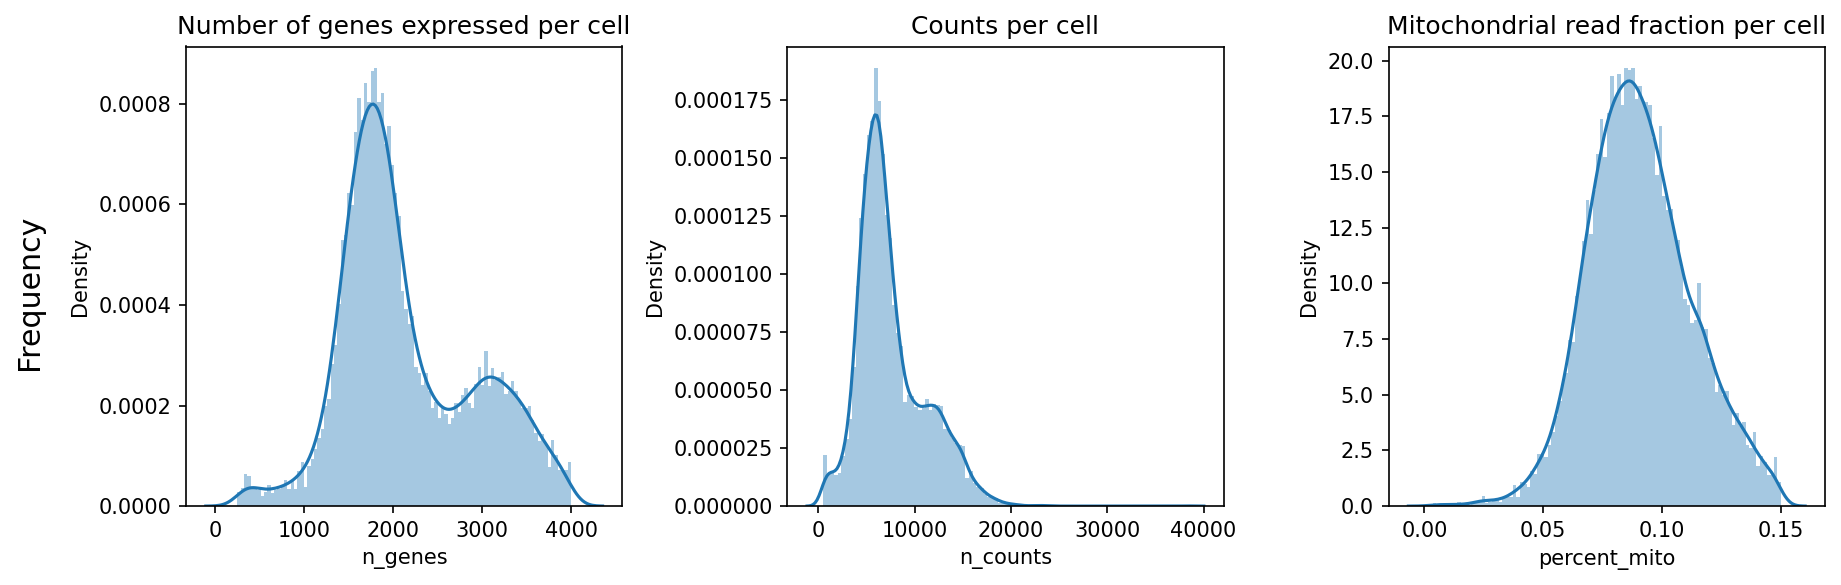

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=150, sharey=False)

adata.obs['n_genes']

sns.distplot( adata.obs['n_genes'], ax=ax1, norm_hist=True, bins=100)
sns.distplot( adata.obs['n_counts'], ax=ax2, norm_hist=True, bins=100)
sns.distplot( adata.obs['percent_mito'], ax=ax3, norm_hist=True, bins=100)

ax1.title.set_text('Number of genes expressed per cell')
ax2.title.set_text('Counts per cell')
ax3.title.set_text('Mitochondrial read fraction per cell')

fig.text(-0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', size='x-large')

fig.tight_layout()

fig.savefig('filtering_panel_postfilter.pdf', dpi=600, bbox_inches='tight')

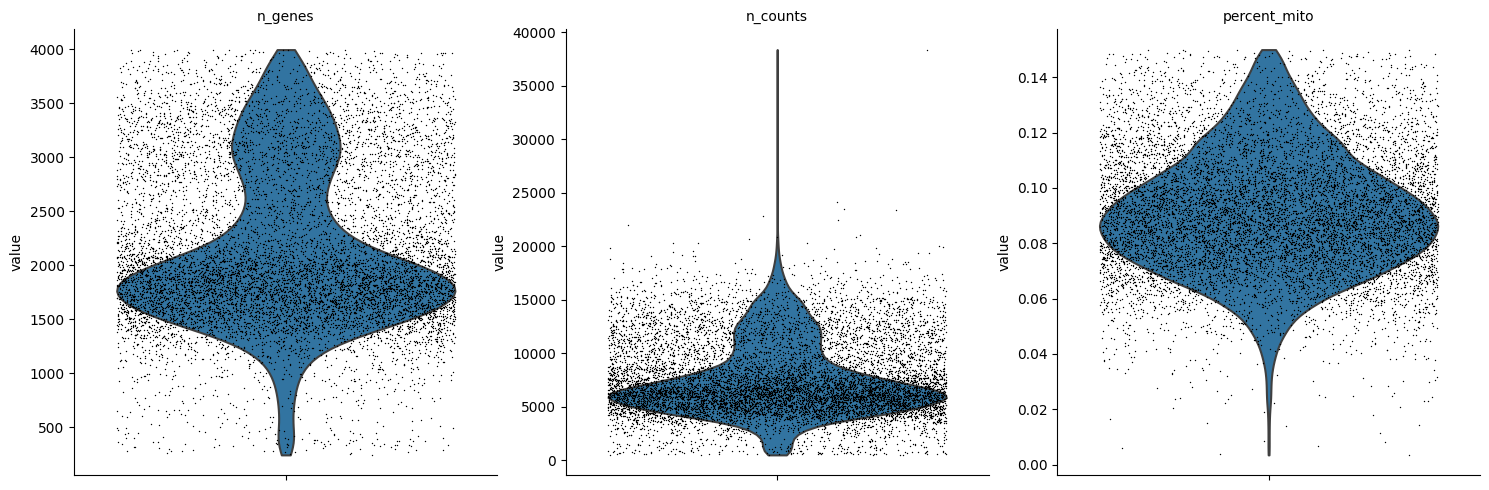

In [25]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
    jitter=0.4, multi_panel=True )

#### Scatter plot, n_genes by n_counts

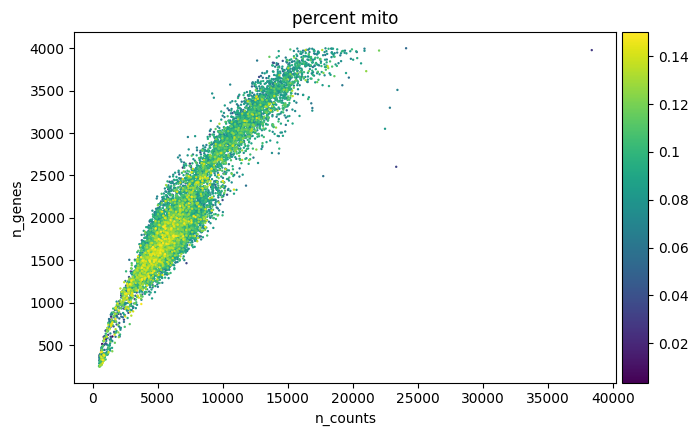

In [26]:
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='percent_mito')

### Finalize the selected filters

Update the anndata file, to be used for further processing, clustering, visualization, etc..

In [27]:
adata.write( f_anndata_path )

# Why they do log here, is there any meaning for taking log of count matrix?

In [28]:
sc.pp.log1p(adata)


/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Output the basic filtered expression matrix to a loom file.  

This can also be used in the command-line pySCENIC steps, for example, or as an input to the Nextflow pipeline.

In [29]:
# create basic row and column attributes for the loom file:
row_attrs = {
    "Gene": np.array(adata.var_names) ,
}
col_attrs = {
    "CellID": np.array(adata.obs_names) ,
    "nGene": np.array( np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,
    "nUMI": np.array( np.sum(adata.X.transpose() , axis=0)).flatten() ,
}
lp.create( f_loom_path_scenic, adata.X.transpose(), row_attrs, col_attrs)

## Further pre-processing of expression data

In [30]:
adata.var

,n_cells
Gene,
AL627309.1,60
AL627309.3,4
AL669831.5,679
FAM87B,13
LINC00115,350
...,...
AC011043.1,77
AL592183.1,32
AC007325.4,239


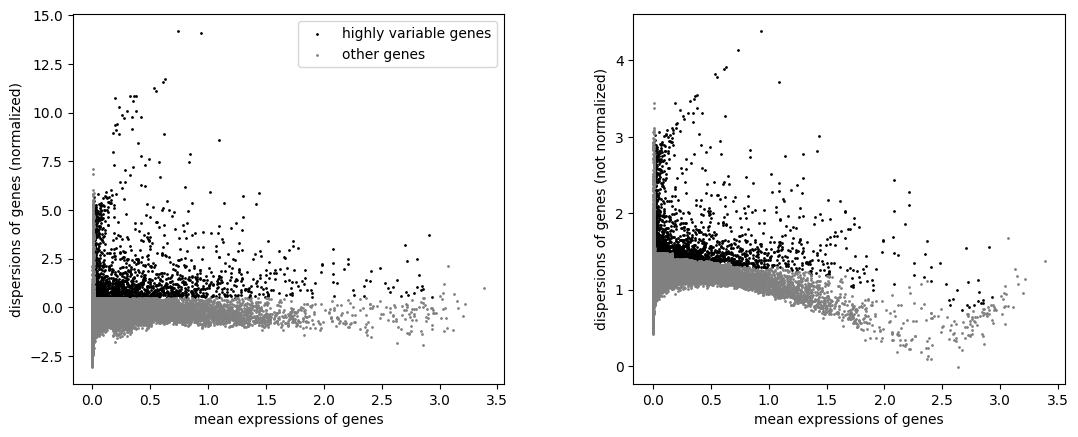

In [31]:
# save a copy of the raw data
adata.raw = adata

# Total-count normalize (library-size correct) to 10,000 reads/cell
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) # More like take mean of each cell

# log transform the data.
sc.pp.log1p(adata)

# identify highly variable genes.
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

# keep only highly variable genes:
adata = adata[:, adata.var['highly_variable']]

# regress out total counts per cell and the percentage of mitochondrial genes expressed
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'] ) #, n_jobs=args.threads)

# scale each gene to unit variance, clip values exceeding SD 10.
sc.pp.scale(adata, max_value=10)

# update the anndata file:
adata.write( f_anndata_path )

### 1 PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


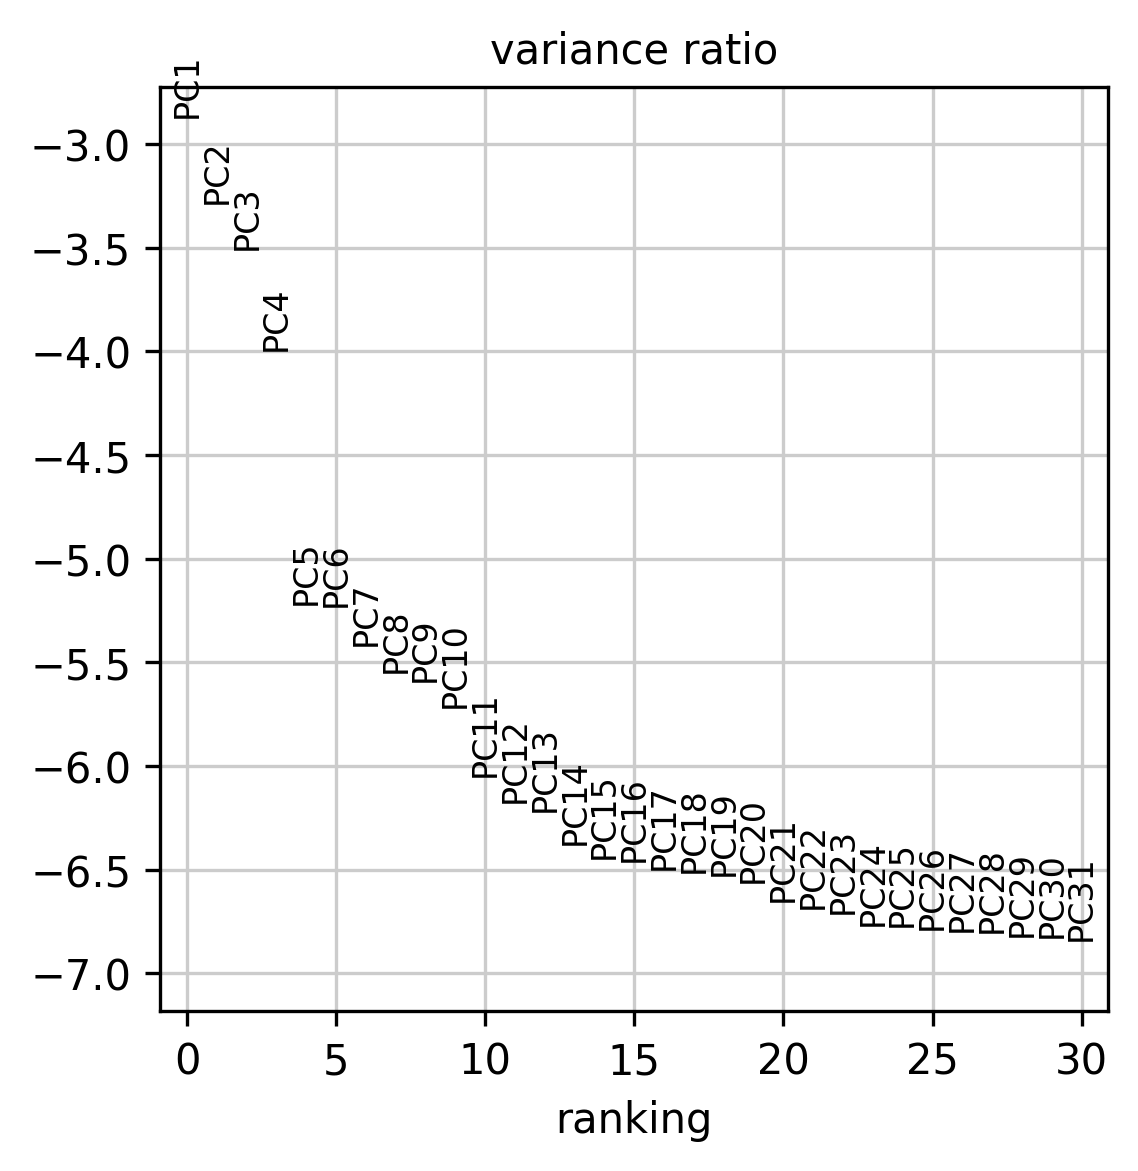

In [26]:
# adata = sc.read_h5ad( f_anndata_path )
# principal component analysis
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)
adata.write( f_anndata_path )

### 1b PCA component selection

In [27]:
# TODO

### 2 Visualization of highly variable genes

In [28]:
# neighborhood graph of cells (determine optimal number of PCs here)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
# compute UMAP
sc.tl.umap(adata)
# tSNE
tsne = TSNE( n_jobs=20 )
adata.obsm['X_tsne'] = tsne.fit_transform( adata.X )
adata.write( f_anndata_path )

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


### 3 Clustering

In [ ]:
# cluster the neighbourhood graph
sc.tl.louvain(adata,resolution=0.4)

sc.pl.umap(adata, color=['louvain'] )

running Louvain clustering


In [ ]:
# find marker genes
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

# sc.tl.rank_genes_groups(adata, 'louvain', method='logreg')
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)
adata.write( f_anndata_path )

In [ ]:
# How to use loompy, check this out!
#Read from loompy file
ds = lp.connect(f_loom_path_scenic)
#Slice the loompy to get first 10 rows 
ten_row = ds[:10,:]
#Slice the loompy file to get first two columns,
ten_column = ds[:,:10]
#How to access glboal properties
for k,v in ds.attrs.items():
    print(k,v)
#How to access row attributes and column attributes
ds.ca.keys()
for k,v in ds.ra.items():
    print(k,len(v))

#For detailed document, please see http://linnarssonlab.org/loompy/apiwalkthrough/index.html


In [ ]:
#Matrix is highly sparse
ds.close()

## SCENIC steps

### STEP 1: Gene regulatory network inference, and generation of co-expression modules
#### Phase Ia: GRN inference using the GRNBoost2 algorithm

For this step the CLI version of SCENIC is used. This step can be deployed on an High Performance Computing system. We use the counts matrix (without log transformation or further processing) from the loom file we wrote earlier.
_Output:_ List of adjacencies between a TF and its targets stored in `ADJACENCIES_FNAME`.

In [14]:
RESOURCES_FOLDER="."
MM_TFS_FNAME = os.path.join(RESOURCES_FOLDER, '/users/jyuan34/da/allTFs_hg38.txt')
SC_EXP_FNAME = os.path.join(RESOURCES_FOLDER, "GSE60361_C1-3005-Expression.txt")#??

ex_matrix = pd.read_csv(SC_EXP_FNAME, sep='\t', header=0, index_col=0).T
tf_names = load_tf_names(MM_TFS_FNAME)
adjancencies = grnboost2(expression_data=ex_matrix, tf_names=tf_names, verbose=True)
adjancencies.head()

FileNotFoundError: [Errno 2] No such file or directory: './GSE60361_C1-3005-Expression.txt'

In [4]:
# transcription factors list
f_tfs = "/users/jyuan34/da/allTFs_hg38.txt" # human
# f_tfs = "/ddn1/vol1/staging/leuven/stg_00002/lcb/cflerin/resources/allTFs_dmel.txt" # drosophila
# f_tfs = "/ddn1/vol1/staging/leuven/stg_00002/lcb/cflerin/resources/allTFs_mm.txt"   # mouse
# tf_names = load_tf_names( f_tfs )

In [60]:
!pyscenic grn {f_loom_path_scenic} {f_tfs} -o adj.csv --num_workers -1

^C
Traceback (most recent call last):
  File "/gpfs/home/jyuan34/my_envs/bin/pyscenic", line 5, in <module>
    from pyscenic.cli.pyscenic import main
  File "/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/pyscenic/cli/pyscenic.py", line 19, in <module>
    from pyscenic.utils import modules_from_adjacencies, add_correlation
  File "/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/pyscenic/utils.py", line 6, in <module>
    from .math import masked_rho4pairs
  File "/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/pyscenic/math.py", line 9, in <module>
    def masked_rho(x: np.ndarray, y: np.ndarray, mask: float = 0.0) -> float:
  File "/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/numba/core/decorators.py", line 219, in wrapper
    disp.compile(sig)
  File "/gpfs/home/jyuan34/my_envs/lib/python3.7/site-packages/numba/core/dispatcher.py", line 965, in compile
    cres = self._compiler.compile(args, return_type)
  File "/gpfs/home/jyuan34/my_envs/lib/python3

read in the adjacencies matrix:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adjacencies = pd.read_csv("/users/jyuan34/da/processed_output- joselynn/expr_mat_arboreto_11_2.adjacencies.tsv", index_col=False, sep='\t')

In [14]:
adjacencies

,TF,target,importance
0,Rps10,Rpl12,2.094264e+02
1,Rps4x,Rps24,2.083132e+02
2,Rps4x,Rps10,2.067482e+02
3,Rpl6,Rpl12,2.066806e+02
4,Rpl6,Rpl17,1.935391e+02
...,...,...,...
6201613,Ppara,Ahrr,5.757298e-24
6201614,Rbm3,Fat3,3.169734e-24
6201615,Atf6b,9530026P05Rik,2.900464e-24
6201616,Rbm17,Gm19744,1.195080e-24


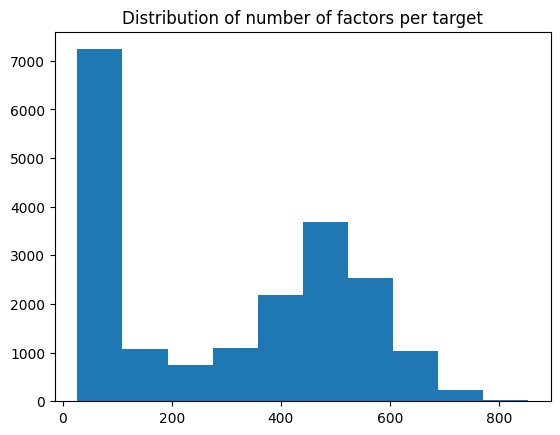

In [35]:
df_count = pd.DataFrame(adjacencies.groupby('target')['TF'].count()).sort_values(by = 'TF',ascending= False)
plt.hist(df_count['TF'])
plt.title('Distribution of number of factors per target')
plt.show()

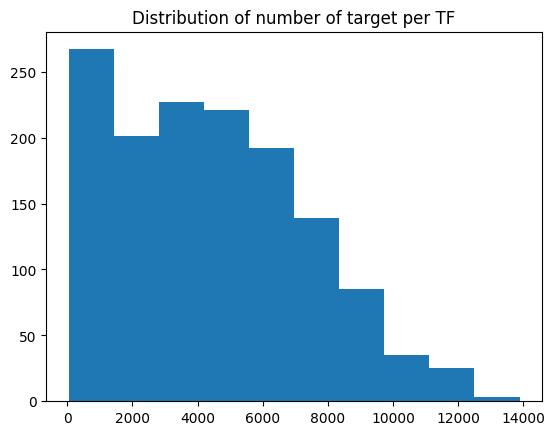

In [36]:
df_count = pd.DataFrame(adjacencies.groupby(by = 'TF')['target'].count()).sort_values(by = 'target',ascending= False)
plt.hist(df_count['target'])
plt.title('Distribution of number of target per TF')
plt.show()

In [40]:
df_sample[df_sample.importance > 5].sort_values(by = 'importance')
# for high importance target, how important is the TF

,TF,target,importance
130697,Zeb2,Vgll3,5.113349
123759,Esr1,Atp8a1,5.353750
118469,Rps4x,Tmem221,5.551104
117750,Ywhaz,Igbp1,5.580731
117451,Ezh2,Smc5,5.592722
110660,Creb3l2,Aff4,5.865277
104897,Rbm3,Cby1,6.114090
97292,Sf3b1,Actn4,6.482976
92313,Suz12,Cdca4,6.741685
80987,Cebpa,Selenop,7.404349


<Figure size 500x200 with 0 Axes>

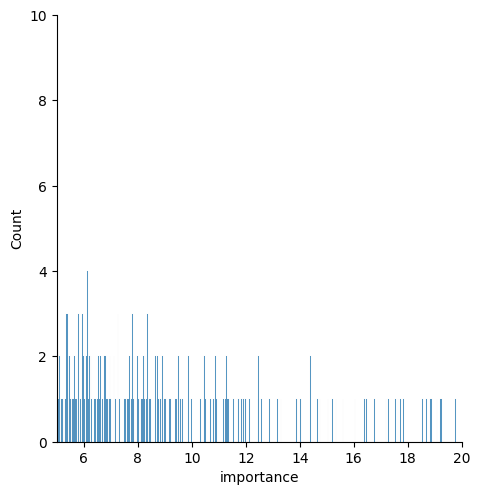

In [80]:
df_sample = adjacencies.sample(10000)
plt.figure(figsize=(5,2))
sns.displot(df_sample['importance'])
plt.xlim((5,20))
plt.ylim((0,10))
plt.show()

In [92]:
df_sample # conclusion to be drawn 

,TF,target,importance
3349158,Kdm4b,Ino80b,0.096068
2709355,Mga,Thbs3,0.145726
3555301,Zfp664,Zfp865,0.083877
5152448,Prdm6,Bcat1,0.016554
186215,Hnrnpc,Zfp827,3.741147
...,...,...,...
4660300,Zfp35,Rangrf,0.034036
2493224,Zfpm1,Scx,0.168606
3795093,Klf13,Krtcap3,0.071272
3230168,Sp100,Tmem185b,0.103742


In [81]:
from collections import defaultdict
def sort_TF(df_sample):
    result = defaultdict(set)
    for target in df_sample.target:
        temp = df_sample[df_sample.target == target].set_index('TF') # comment more
        temp = temp['importance'].sort_values(ascending = False)
        temp = temp/temp.sum()
        for i in range(len(temp)):
            if temp[i] >=0.1:
                result[target].add((temp.index[i],temp[i]))
    return result
result = sort_TF(df_sample)
result
#Social network 

defaultdict(set,
            {'Ino80b': {('Rpl35', 0.9852384306033379)},
             'Thbs3': {('Mga', 1.0)},
             'Zfp865': {('Suz12', 0.8201726239852397),
              ('Zfp664', 0.17982737601476037)},
             'Bcat1': {('Prdm6', 0.999710957775401)},
             'Zfp827': {('Hnrnpc', 0.9152728585725467)},
             'Clybl': {('Taf7', 1.0)},
             'Psmb6': {('Sod1', 0.9523537312422053)},
             'Slc27a3': {('Smad1', 1.0)},
             'Ect2': {('Canx', 1.0)},
             'Atg14': {('Zfp950', 1.0)},
             'Praf2': {('Nr2f6', 1.0)},
             'Akap9': {('Zfp169', 1.0)},
             'Npm1': {('Zfp553', 0.9754974197350927)},
             'Draxin': {('Nfat5', 1.0)},
             'Pycr2': {('Aven', 1.0)},
             'Ash2l': {('Rreb1', 1.0)},
             'Dlgap4': {('Ywhaz', 1.0)},
             'Nsd1': {('Hcfc1', 1.0)},
             'Gm39323': {('Mta3', 1.0)},
             'Stx6': {('Dnajc21', 0.8352271427604512)},
             'Ndufb6': {('Rp

### STEP 2-3: Regulon prediction aka cisTarget from CLI

For this step the CLI version of SCENIC is used. This step can be deployed on an High Performance Computing system.

_Output:_ List of adjacencies between a TF and its targets stored in `MOTIFS_FNAME`.

locations for ranking databases, and motif annotations:

In [10]:
import glob
# ranking databases
f_db_glob = "/ddn1/vol1/staging/leuven/res_00001/databases/cistarget/databases/homo_sapiens/hg38/refseq_r80/mc9nr/gene_based/*feather"
f_db_names = ' '.join( glob.glob(f_db_glob) )

# motif databases
f_motif_path = "/ddn1/vol1/staging/leuven/res_00001/databases/cistarget/motif2tf/motifs-v9-nr.hgnc-m0.001-o0.0.tbl"

Here, we use the `--mask_dropouts` option, which affects how the correlation between TF and target genes is calculated during module creation. It is important to note that prior to pySCENIC v0.9.18, the default behavior was to mask dropouts, while in v0.9.18 and later, the correlation is performed using the entire set of cells (including those with zero expression). When using the `modules_from_adjacencies` function directly in python instead of via the command line, the `rho_mask_dropouts` option can be used to control this.

In [ ]:
!pyscenic ctx adj.tsv \
    {f_db_names} \
    --annotations_fname {f_motif_path} \
    --expression_mtx_fname {f_loom_path_scenic} \
    --output reg.csv \
    --mask_dropouts \
    --num_workers 20

In [14]:
import pandas as pd
anno = pd.read_csv('/users/jyuan34/da/processed_output- joselynn/all_data.combined_reg_11_2.csv')
anno['Enrichment.6'][3]

"[('Slc35a5', 0.9926052369398352), ('Picalm', 0.5342154173149974), ('Aff4', 0.7989389170883858), ('Epc1', 0.5941224755205976), ('Stx4a', 2.862172485989749), ('Commd8', 0.5915811937213626), ('Cpt1a', 0.3916701818157553), ('Gba', 1.6747226626378635), ('Atf4', 0.4390242214908223), ('Plod1', 2.135335007347866), ('Ptprs', 1.423315992604805), ('Col5a1', 0.8322174799711706), ('Josd1', 0.6309007703747993), ('Rbm15b', 0.6060404191518144), ('Ric1', 0.5960444408707141), ('Mfsd1', 0.8377483117149859), ('Dctn4', 0.3939460733981318), ('Dusp3', 0.4099883401864327), ('Bptf', 0.3690148243361145), ('Crebrf', 0.7319692629526067), ('Mtm1', 0.5209618111878955), ('Atp6v0b', 0.5640289205996475), ('Mms19', 0.5875031924994363), ('Ppm1h', 0.7306828109876845), ('Pim1', 0.4820377264612607), ('Get4', 0.925289494702073), ('Zfp521', 1.157551707135542), ('Zmym6', 2.154292588276917), ('Cd164', 0.5171003618096522), ('Tomm34', 0.4716652614866142), ('Rnf146', 0.3596192030105366), ('Trp53inp2', 0.3691614062675213), ('Pmvk

### STEP 4: Cellular enrichment (aka AUCell) from CLI

It is important to check that most cells have a substantial fraction of expressed/detected genes in the calculation of the AUC.
The following histogram gives an idea of the distribution and allows selection of an appropriate threshold.
In this plot, a few thresholds are highlighted, with the number of genes selected shown in red text and the corresponding percentile in parentheses).
See [the relevant section in the R tutorial](https://bioconductor.org/packages/devel/bioc/vignettes/AUCell/inst/doc/AUCell.html#build-gene-expression-rankings-for-each-cell) for more information.

By using the default setting for `--auc_threshold` of `0.05`, we see that **1192** genes are selected for the rankings based on the plot below.

In [ ]:
nGenesDetectedPerCell = np.sum(adata.X>0, axis=1)
percentiles = nGenesDetectedPerCell.quantile([.01, .05, .10, .50, 1])
print(percentiles)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=150)
sns.distplot(nGenesDetectedPerCell, norm_hist=False, kde=False, bins='fd')
for i,x in enumerate(percentiles):
    fig.gca().axvline(x=x, ymin=0,ymax=1, color='red')
    ax.text(x=x, y=ax.get_ylim()[1], s=f'{int(x)} ({percentiles.index.values[i]*100}%)', color='red', rotation=30, size='x-small',rotation_mode='anchor' )
ax.set_xlabel('# of genes')
ax.set_ylabel('# of cells')
fig.tight_layout()

In [ ]:
!pyscenic aucell \
    {f_loom_path_scenic} \
    reg.csv \
    --output {f_pyscenic_output} \
    --num_workers 20

### Visualization of SCENIC's AUC matrix

First, load the relevant data from the loom we just created

In [82]:
import json
import zlib
import base64

# collect SCENIC AUCell output
lf = lp.connect( '/users/jyuan34/da/processed_output- joselynn/all_data.combined_auc_mtx.loom', mode='r+', validate=False )
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
lf.close()

In [83]:
auc_mtx

,2610044O15Rik8(+),Adnp2(+),Ahctf1(+),Ahr(+),Arid3a(+),Arid5b(+),Arnt(+),Arntl(+),Atf2(+),Atf3(+),...,Zfp937(+),Zfp938(+),Zfp951(+),Zfp960(+),Zfp965(+),Zfp966(+),Zfp975(+),Zhx1(+),Zkscan8(+),Zmiz1(+)
AAACCCACATGGAGAC-1_1,0.000000,0.075176,0.079062,0.048243,0.007659,0.172910,0.073415,0.096184,0.026126,0.072661,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.071665,0.074026
AAACCCAGTAATCAGA-1_1,0.000000,0.000000,0.093688,0.051978,0.029414,0.166428,0.079310,0.057440,0.074698,0.077027,...,0.000000,0.045560,0.073179,0.005488,0.000000,0.071995,0.0,0.00000,0.000000,0.072844
AAACCCAGTGATTCTG-1_1,0.000000,0.021995,0.041887,0.009344,0.031049,0.103994,0.071601,0.056757,0.052548,0.061804,...,0.014250,0.043164,0.000000,0.003629,0.000000,0.000000,0.0,0.00000,0.000000,0.071586
AAACCCAGTTAGAAGT-1_1,0.000000,0.057518,0.096279,0.045531,0.014602,0.051806,0.052765,0.052964,0.058686,0.080199,...,0.000000,0.020074,0.000000,0.000000,0.062810,0.000000,0.0,0.00000,0.000000,0.067675
AAACCCATCACGATCA-1_1,0.000000,0.038156,0.102493,0.072089,0.013420,0.116052,0.069434,0.061086,0.053871,0.082884,...,0.030802,0.000000,0.045573,0.043990,0.104864,0.000000,0.0,0.00000,0.000000,0.070824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCACGGCCAT-1_2,0.131599,0.023905,0.051838,0.023377,0.022113,0.013011,0.047183,0.047521,0.043964,0.065263,...,0.000000,0.000000,0.004888,0.034121,0.155901,0.044238,0.0,0.01845,0.000000,0.065026
TTTGTTGGTCACTCAA-1_2,0.000000,0.000000,0.021986,0.063582,0.011421,0.052664,0.053909,0.051798,0.031476,0.058058,...,0.000000,0.096654,0.000000,0.013011,0.053051,0.000000,0.0,0.00000,0.000000,0.061301
TTTGTTGGTGGCGCTT-1_2,0.000000,0.022718,0.017705,0.000000,0.019341,0.014679,0.049959,0.036688,0.033922,0.061052,...,0.021508,0.038744,0.000000,0.000000,0.096344,0.000000,0.0,0.00000,0.000000,0.057724
TTTGTTGGTTGTGGCC-1_2,0.000000,0.000000,0.031148,0.007669,0.023883,0.000000,0.049931,0.044316,0.063178,0.053146,...,0.000000,0.035523,0.012942,0.000000,0.070477,0.000000,0.0,0.00000,0.000000,0.063291


In [84]:
import umap

# UMAP
runUmap = umap.UMAP(n_neighbors=10, min_dist=0.4, metric='correlation').fit_transform
dr_umap = runUmap( auc_mtx )
pd.DataFrame(dr_umap, columns=['X', 'Y'], index=auc_mtx.index).to_csv( "scenic_umap.txt", sep='\t')
# tSNE
tsne = TSNE( n_jobs=20 )
dr_tsne = tsne.fit_transform( auc_mtx )
pd.DataFrame(dr_tsne, columns=['X', 'Y'], index=auc_mtx.index).to_csv( "scenic_tsne.txt", sep='\t')

KeyboardInterrupt: 

In [85]:
import matplotlib.pyplot as plt
umap = pd.DataFrame(dr_umap, columns=['X', 'Y'], index=auc_mtx.index)
tsne = pd.DataFrame(dr_tsne, columns=['X', 'Y'], index=auc_mtx.index)
plt.scatter(umap['X'],umap['Y'])
plt.show()

plt.scatter(tsne['X'],tsne['Y'])
plt.show()

NameError: name 'dr_umap' is not defined

In [86]:
#import umap

# UMAP
runUmap = umap.UMAP(n_neighbors=20, min_dist=0.3, metric='correlation').fit_transform
dr_umap = runUmap( auc_mtx )
pd.DataFrame(dr_umap, columns=['X', 'Y'], index=auc_mtx.index).to_csv( "scenic_umap.txt", sep='\t')
# tSNE
tsne = TSNE( n_jobs=20 )
dr_tsne = tsne.fit_transform( auc_mtx )
pd.DataFrame(dr_tsne, columns=['X', 'Y'], index=auc_mtx.index).to_csv( "scenic_tsne.txt", sep='\t')

In [87]:
import umap

# UMAP
runUmap = umap.UMAP(n_neighbors=30, min_dist=0.4, metric='correlation').fit_transform
dr_umap = runUmap( auc_mtx )
pd.DataFrame(dr_umap, columns=['X', 'Y'], index=auc_mtx.index).to_csv( "scenic_umap.txt", sep='\t')
# tSNE
tsne = TSNE( n_jobs=20 )
dr_tsne = tsne.fit_transform( auc_mtx )
pd.DataFrame(dr_tsne, columns=['X', 'Y'], index=auc_mtx.index).to_csv( "scenic_tsne.txt", sep='\t')

## Integrate the output

Here, we combine the results from SCENIC and the Scanpy analysis into a SCope-compatible loom file

In [ ]:
# scenic output
lf = lp.connect( f_pyscenic_output, mode='r+', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
#exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID)
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
regulons = lf.ra.Regulons
dr_umap = pd.read_csv( 'scenic_umap.txt', sep='\t', header=0, index_col=0 )
dr_tsne = pd.read_csv( 'scenic_tsne.txt', sep='\t', header=0, index_col=0 )
###

Fix regulon objects to display properly in SCope:

In [ ]:
auc_mtx.columns = auc_mtx.columns.str.replace('\(','_(')
regulons.dtype.names = tuple( [ x.replace("(","_(") for x in regulons.dtype.names ] )
# regulon thresholds
rt = meta['regulonThresholds']
for i,x in enumerate(rt):
    tmp = x.get('regulon').replace("(","_(")
    x.update( {'regulon': tmp} )

Concatenate embeddings (tSNE, UMAP, etc.)

In [ ]:
tsneDF = pd.DataFrame(adata.obsm['X_tsne'], columns=['_X', '_Y'])

Embeddings_X = pd.DataFrame( index=lf.ca.CellID )
Embeddings_X = pd.concat( [
        pd.DataFrame(adata.obsm['X_umap'],index=adata.obs.index)[0] ,
        pd.DataFrame(adata.obsm['X_pca'],index=adata.obs.index)[0] ,
        dr_tsne['X'] ,
        dr_umap['X']
    ], sort=False, axis=1, join='outer' )
Embeddings_X.columns = ['1','2','3','4']

Embeddings_Y = pd.DataFrame( index=lf.ca.CellID )
Embeddings_Y = pd.concat( [
        pd.DataFrame(adata.obsm['X_umap'],index=adata.obs.index)[1] ,
        pd.DataFrame(adata.obsm['X_pca'],index=adata.obs.index)[1] ,
        dr_tsne['Y'] ,
        dr_umap['Y']
    ], sort=False, axis=1, join='outer' )
Embeddings_Y.columns = ['1','2','3','4']

Metadata:

In [ ]:
### metadata
metaJson = {}

metaJson['embeddings'] = [
    {
        "id": -1,
        "name": f"Scanpy t-SNE (highly variable genes)"
    },
    {
        "id": 1,
        "name": f"Scanpy UMAP  (highly variable genes)"
    },
    {
        "id": 2,
        "name": "Scanpy PC1/PC2"
    },
    {
        "id": 3,
        "name": "SCENIC AUC t-SNE"
    },
    {
        "id": 4,
        "name": "SCENIC AUC UMAP"
    },
]

metaJson["clusterings"] = [{
            "id": 0,
            "group": "Scanpy",
            "name": "Scanpy louvain default resolution",
            "clusters": [],
        }]

metaJson["metrics"] = [
        {
            "name": "nUMI"
        }, {
            "name": "nGene"
        }, {
            "name": "Percent_mito"
        }
]

metaJson["annotations"] = [
    {
        "name": "Louvain_clusters_Scanpy",
        "values": list(set( adata.obs['louvain'].astype(np.str) ))
    },
    #{
    #    "name": "Genotype",
    #    "values": list(set(adata.obs['Genotype'].values))
    #},
    #{
    #    "name": "Timepoint",
    #    "values": list(set(adata.obs['Timepoint'].values))
    #},
    #{
    #    "name": "Sample",
    #    "values": list(set(adata.obs['Sample'].values))
    #}
]

# SCENIC regulon thresholds:
metaJson["regulonThresholds"] = rt

for i in range(max(set([int(x) for x in adata.obs['louvain']])) + 1):
    clustDict = {}
    clustDict['id'] = i
    clustDict['description'] = f'Unannotated Cluster {i + 1}'
    metaJson['clusterings'][0]['clusters'].append(clustDict)
    
clusterings = pd.DataFrame()
clusterings["0"] = adata.obs['louvain'].values.astype(np.int64)

Assemble loom file row and column attributes

In [ ]:
def dfToNamedMatrix(df):
    arr_ip = [tuple(i) for i in df.values]
    dtyp = np.dtype(list(zip(df.dtypes.index, df.dtypes)))
    arr = np.array(arr_ip, dtype=dtyp)
    return arr

In [ ]:
col_attrs = {
    "CellID": np.array(adata.obs.index),
    "nUMI": np.array(adata.obs['n_counts'].values),
    "nGene": np.array(adata.obs['n_genes'].values),
    "Louvain_clusters_Scanpy": np.array( adata.obs['louvain'].values ),
    #"Genotype": np.array(adata.obs['Genotype'].values),
    #"Timepoint": np.array(adata.obs['Timepoint'].values),
    #"Sample": np.array(adata.obs['Sample'].values),
    "Percent_mito": np.array(adata.obs['percent_mito'].values),
    "Embedding": dfToNamedMatrix(tsneDF),
    "Embeddings_X": dfToNamedMatrix(Embeddings_X),
    "Embeddings_Y": dfToNamedMatrix(Embeddings_Y),
    "RegulonsAUC": dfToNamedMatrix(auc_mtx),
    "Clusterings": dfToNamedMatrix(clusterings),
    "ClusterID": np.array(adata.obs['louvain'].values)
}

row_attrs = {
    "Gene": lf.ra.Gene,
    "Regulons": regulons,
}

attrs = {
    "title": "sampleTitle",
    "MetaData": json.dumps(metaJson),
    "Genome": 'hg38',
    "SCopeTreeL1": "",
    "SCopeTreeL2": "",
    "SCopeTreeL3": ""
}

# compress the metadata field:
attrs['MetaData'] = base64.b64encode(zlib.compress(json.dumps(metaJson).encode('ascii'))).decode('ascii')

Create a new loom file, copying the expression matrix from the open loom connection:

In [ ]:
lp.create(
    filename = f_final_loom ,
    layers=lf[:,:],
    row_attrs=row_attrs, 
    col_attrs=col_attrs, 
    file_attrs=attrs
)
lf.close() # close original pyscenic loom file

This loom file can now be imported into [SCope](http://scope.aertslab.org/).